# lec03_basic_model_img

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# seed 고정

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [4]:
tf.random.set_seed(1)
np.random.seed(1)

# data load

In [5]:
from keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()  # (trainset), (testset)
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train[:1].shape # 1장, 28 * 28

(1, 28, 28)

In [8]:
y_train[:1]

array([5], dtype=uint8)

# EDA

## imshow
<pre>
matplotlib.pyplot.imshow(X, cmap=None, norm=None, *,
                        aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, 
                        interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
                        ref : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
* Z = 픽셀 값을 갖는 행렬
* plt.imshow(Z)
* plt.show()

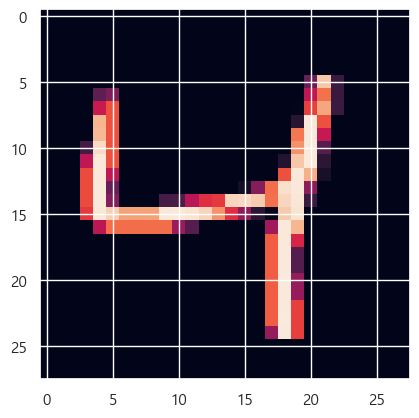

In [9]:
plt.imshow(X_train[2:3][0])     # 2번째 장
plt.show()

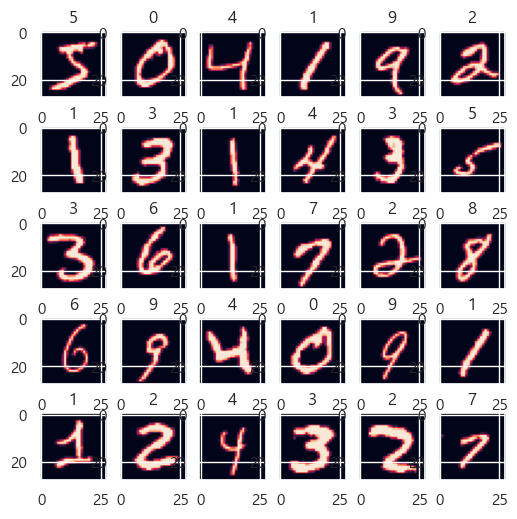

In [10]:
fig, axes = plt.subplots(5,6, figsize = (6,6))
for i,img in enumerate( X_train[:30] ) :
    row = i//6
    col = i%6
    # axes[row][col].imshow(X_train[i:i+1][0])
    axes[row][col].imshow(img)
    axes[row][col].set_title(y_train[i])

# plt.tight_layout()
plt.show()

## target 분포도

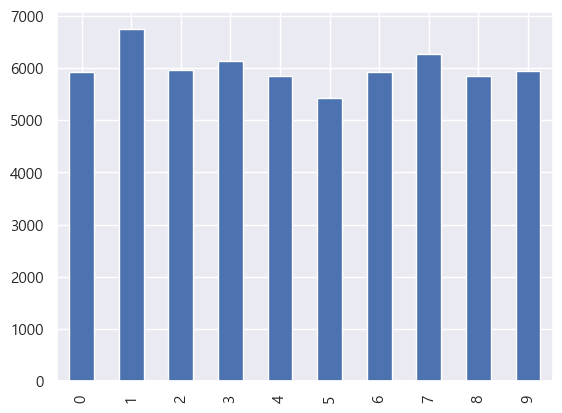

In [11]:
pd.Series(y_train).value_counts().sort_index().plot(kind = "bar")
plt.show()

## n번이미지

In [12]:
# s = pd.Series(y_train)
# idx = s[s.values == 0].index

# fig, axes = plt.subplots(5,6, figsize = (6,6))
# for i, idx in enumerate (idx[:30]):
#     row = i //6
#     col = i % 6
#     # axes[row][col].imshow(X_train[i:i+1][0])
#     axes[row][col].imshow(X_train[idx])
#     axes[row][col].set_title(y_train[idx])
#     plt.axis("off")
#     plt.grid(False)
# # X_train[3].shape

# plt.show()

In [13]:
# fig, axes = plt.subplots(10,10, figsize = (9,9))
# for i in range(0,10):
#     idx = s[s.values == i].index
#     for ii, idx in enumerate (idx[:10]):
#         row = i 
#         col = ii % 10
#         # axes[row][col].imshow(X_train[i:i+1][0])
#         axes[row][col].imshow(X_train[idx])
#         axes[row][col].set_title(y_train[idx])
#         plt.axis("off")
#         plt.grid(False)
# plt.show()

# 전처리 & 가공

## Flatten (Reshape)
<pre>
* 이미지픽셀 행렬28*28 (2D)   >>  arr (1D) 

### 1장

In [14]:
X_train[0].flatten().shape

(784,)

### 60000장

In [15]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)



In [16]:
# X_train=X_train.reshape(60000,-1)

## Scaling
* MinmaxScaler() : 0 ~ 255 픽셀 값을 0 ~ 1 값으로 변경

In [17]:
X_train_sc = X_train / 255.0
# 소숫점으로 나와야 되니까 255.0으로 나눈다  >> 확실히 float으로 할려고
X_test_sc  = X_test / 255.0
# X_train[:1]

## Target 더미화
* 0 ~ 9 숫자
    - 0 : 1000000000
* sklearn.
    - OneHotEncoder()
    - pd.get_dummies()
* keras.
    - utiles.to_categorical


In [18]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes=10, dtype="int")
y_test_oh = to_categorical(y_test, num_classes=10, dtype="int")
print(y_train[:1],y_train_oh[:1])
print()
print(y_test[:1],y_test_oh[:1])

[5] [[0 0 0 0 0 1 0 0 0 0]]

[7] [[0 0 0 0 0 0 0 1 0 0]]


# Model

* X_train.shape >>>(60000, 784) //// input_dim=784
    - 장수 뺀 나머지 입력!!!

In [20]:
model = Sequential()
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=50,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [21]:
fit_hisroty = model.fit(X_train_sc, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_sc, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3121 - accuracy: 0.9093 - val_loss: 0.1391 - val_accuracy: 0.9584
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1088 - val_accuracy: 0.9666
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9780 - val_loss: 0.1010 - val_accuracy: 0.9701
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0774 - val_accuracy: 0.9779
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0765 - val_accuracy: 0.9776
Epoch 

# 예측

## 예측

In [ ]:
proba = model.predict(X_test_sc)
proba[:3]

In [ ]:
pred = np.argmax(proba, axis=1)


y_test = np.argmax(y_test_oh, axis=1)
print(pred[:3], y_test[:3])

## 오답 검증

### confusion metrixs
* from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,pred)
print(cm)

### cross table

from pandas import crosstab

In [ ]:
y_test[:2]

In [ ]:
pd.crosstab( y_test,pred)

In [ ]:
pred[(y_test == 0) & (pred !=0)]

### df

In [ ]:
ans_df = pd.DataFrame( {"y_test":y_test,"pred":pred} )
ans_df.head(2)

In [ ]:
ans_df[ans_df["y_test"]!=ans_df["pred"]].index

### 시각화

In [ ]:
# fig, axes = plt.subplots(10,1,figsize = (8,2))
# for i in range(0,10):
#     row = i
#     # col = i%2
#     plt.subplot(row+1,1,row+1)
#     plt.title(i)
#     plt.plot(pred[(y_test == i) & (pred !=i)])
#     plt.show()

In [ ]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 사용자 데이터 예측
* Jupyter web widgets : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.htmlhttps://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [ ]:
# ! pip install ipywidgets


In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.IntSlider()

In [ ]:
btn = widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True  # True to accept multiple files upload else False
)
display(btn)

In [ ]:
# once a file is uploaded, use the `.value` attribute to retrieve the content:
btn.value
#=> (
#=>   {
#=>     'name': 'example.txt',
#=>     'type': 'text/plain',
#=>     'size': 36,
#=>     'last_modified': datetime.datetime(2020, 1, 9, 15, 58, 43, 321000, tzinfo=datetime.timezone.utc), 
#=>     'content': <memory at 0x10c1b37c8>
#=>   },
#=> )

In [ ]:
for dic in btn.value:
    print( f"{dic['name']} {dic['size']}" )

In [ ]:
for dic in btn.value:
    display(widgets.Image(value=dic['content'].tobytes()))

In [ ]:
from PIL import Image
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1,  len(btn.value),       i+1)
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr = dic['content']                주소
    # io_obj = io.BytesIO(dic['content'])   읽고 쓸 수 있게
    # bbyte = dic['content'].tobytes()         꺼낼 수 있게 IO 객체
    #       
    # print(a, b, c)
    # ------------------------------------------------
    # display(widgets.Image(value=dic.content.tobytes()))
    # ------------------------------------------------
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28))   # PIL(python image library) 활용 이미지 핸들링
    plt.imshow(img)
    # ------------------------------------------------             # 학습 위한 차원 축소 / input_dim(1,784)
    print(np.array(img).shape,  np.array(img)[:, :, 1].shape)      # (28,28,3) 컬러, (28,28) 흑백
    
    img = np.array(img)[:, :, 1]                                   # [:, :, 1] 마지막 차원 날리기(1 대입)
    img = (np.expand_dims(img,0)).reshape(1,-1)                    # expand_dims 차원 확대, 0은 행추가(1은 열추가) // .reshape 차원축소 28*28를 784로
    print(img.shape) 

    
    img_scaler = (255-img)/255.0                                   # 엣지크롭 색반전(255-img) + 스케일링(/255.0)
    print(img_scaler.shape)
    proba = model.predict(img_scaler)
    print(np.argmax(proba))